# 1. Objective
1. Come up with a customer profile (characteristics of a customer) of the different products
2. Perform univariate and multivariate analyses
3. Generate a set of insights and recommendations that will help the company in targeting new customers

# 2. Dataset
The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables

- Product - The model no. of the treadmill
- Age -  Age of the customer in no of years
- Gender - Gender of the customer
- Education - Education of the customer in no. of years
- Marital Status - Marital status of the customer
- Usage - Avg. # times the customer wants to use the treadmill every week
- Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
- Income - Income of the customer
- Miles- Miles that a customer expects to run

# 3. Import the python packages
Import the necessary packages - pandas, numpy, seaborn, matplotlib.pyplot

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

# 4. Load the dataset

In [5]:
cardiofitness = pd.read_csv("./datasets/CardioGoodFitness.csv")

# 5. Data Insights

### 5.1 View the first few rows of the dataset

In [8]:
cardiofitness.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


__Observations__
* The dataset looks clean and consistent with the description provided.

### 5.2 Check the shape of the dataset

In [15]:
cardiofitness.shape

(180, 9)

__Observations__
* The dataset consists of 180 observations of 9 columns

### 5.3 Check the datatype of the variables and for missing values

In [32]:
cardiofitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [95]:
# check if there are any null values in the dataset
cardiofitness.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

__Observations__
* `Product`, `Gender` and `MaritalStatus` are of Object data type and hence categorical by nature
* Rest of the values are of Integer data type
* No column has null/missing values

### 5.4 Understanding the features in the dataset

In [31]:
# list the colums in the dataset
cardiofitness.columns.values

array(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'], dtype=object)

In [16]:
# count the unique values in each column
cardiofitness.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

__Observations__
* We see that `Product`, `Gender`, `Education`, `Marital Status`, `Usage` and `Fitness` all have discrete values and are categorical in nature.

In [17]:
# print all the unique values
print(cardiofitness.Product.unique())
print(cardiofitness.Gender.unique())
print(cardiofitness.Education.unique())
print(cardiofitness.MaritalStatus.unique())
print(cardiofitness.Usage.unique())
print(cardiofitness.Fitness.unique())

['TM195' 'TM498' 'TM798']
['Male' 'Female']
[14 15 12 13 16 18 20 21]
['Single' 'Partnered']
[3 2 4 5 6 7]
[4 3 2 1 5]


# 6. Statistical Summary

### 6.1 Analyze the quantitative variables in the dataset

In [27]:
# get a statistical summary of the dataset
cardiofitness.describe().round(2)

,Age,Education,Usage,Fitness,Income,Miles
count,180.00,180.00,180.00,180.00,180.00,180.00
mean,28.79,15.57,3.46,3.31,53719.58,103.19
std,6.94,1.62,1.08,0.96,16506.68,51.86
min,18.00,12.00,2.00,1.00,29562.00,21.00
25%,24.00,14.00,3.00,3.00,44058.75,66.00
50%,26.00,16.00,3.00,3.00,50596.50,94.00
75%,33.00,16.00,4.00,4.00,58668.00,114.75
max,50.00,21.00,7.00,5.00,104581.00,360.00


In [29]:
cardiofitness.mode()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,25,Male,16,Partnered,3,3,45480,85


__Observations__
- The mean, median and mode of `Education` and `Fitness` are approximately equal to each other - so the distribution can be assumed to be approximately symmetrical.
- ----------
- For `Age`, the mean > median > mode and hence the distribution will be skewed to the right.
- The mean of `Usage`, `Income` and `Miles` are closer to the 75% percentile of the data, indicating a right skew.
- ----------
- `Income` is spread over a wide range, from 29562 to 104581. Similarly, `Miles` is spread over a wide range from 21 to 360.
- Standard Deviation is high for `Income` and `Miles`
- Mean value is greater than median value for `Income` and `Miles`. Also there is a notably large differnece in 75th percentile and max values of predictors `Income` and `Miles`. These two observations suggest that there are extreme values-Outliers in the dataset


# 7. Data Visualization

# 7.1 Check Outliers

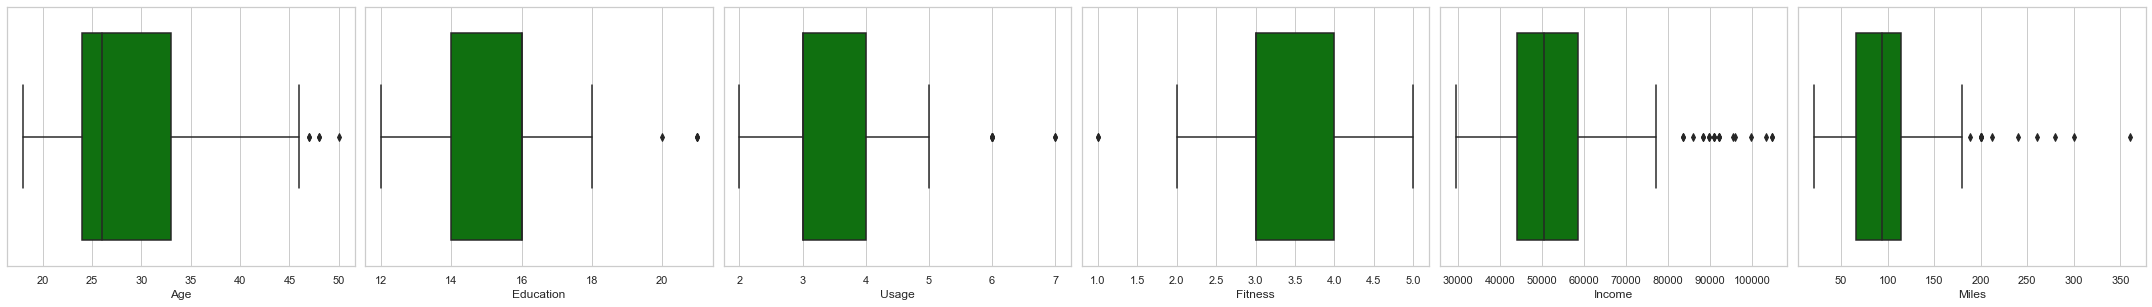

In [193]:
# Plot the box plot to check for outliers in the distribution
cdf_copy=cardiofitness.copy()
cdf_copy=cdf_copy.drop(['Product', 'Gender', 'MaritalStatus'], axis=1)
l = cdf_copy.columns.values
number_of_columns=6
number_of_rows = int(len(l)-1/number_of_columns)
plt.figure(figsize=(30,25))
for i in range(0,len(l)):
    plt.subplot(number_of_rows+1, number_of_columns, i+1)
    sns.set_style('whitegrid')
    sns.boxplot(data=cdf_copy,x=l[i],color='green')
    plt.tight_layout()

__Observations__: Except `Fitness`, all other feature columns show outliers. 

## 7.2 Check distribution - skewness

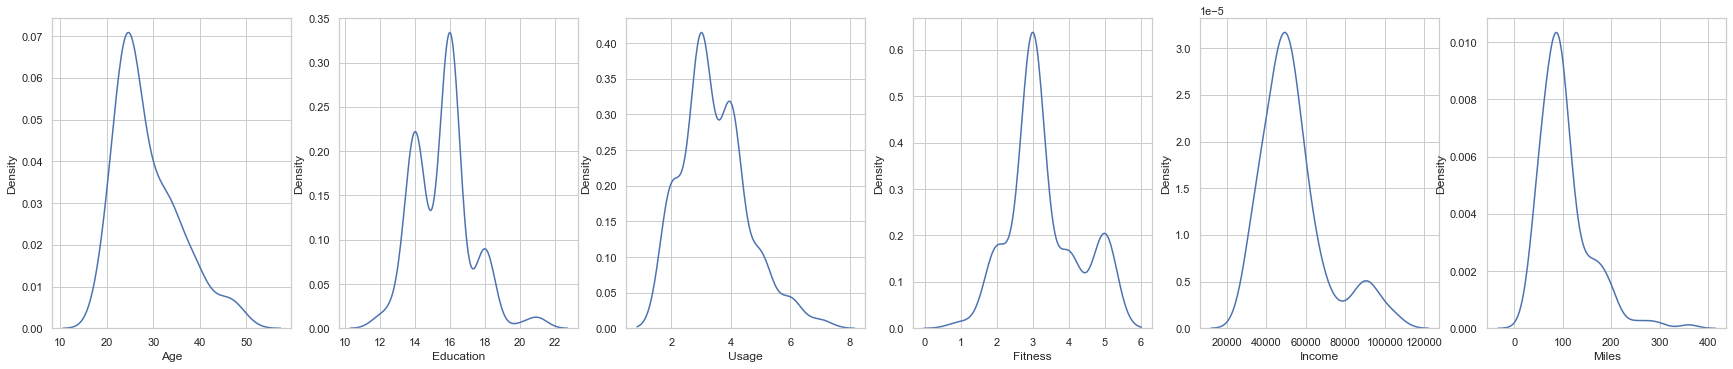

In [206]:
# Plot the kde plot to check for skewness in the distribution
plt.figure(figsize=(30,40))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.kdeplot(x=l[i],data=cdf_copy) 

__Observations__
1. `Fitness` column appear *closer* to normal distribution.
2. Remaining all feature variables are right skewed.

## 7.3 Analyze the features in the dataset

Let us analyze various features in the dataset and jot down the observations

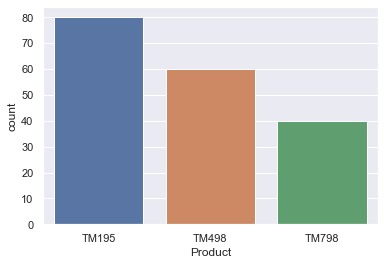

In [28]:
# countplot for Product
sns.countplot(x = 'Product', data = cardiofitness);

__Observations (Product)__
* The sum of the count of 3 products equal 180 which is the total number of entries
* "TM195" is the most popular product used by around half the poeple

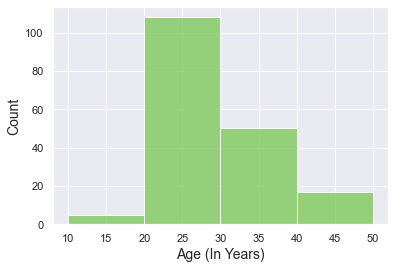

In [64]:
# histogram for Age
hist = sns.histplot(cardiofitness.Age, bins=[10, 20, 30, 40, 50], color='#78C850');
hist.set_xlabel("Age (In Years)", fontsize=14)
hist.set_ylabel("Count", fontsize=14)
plt.show()

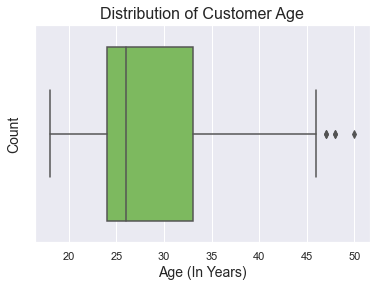

In [49]:
# boxplot for Age
boxplot = sns.boxplot(x='Age', data=cardiofitness, color='#78C850');
boxplot.axes.set_title("Distribution of Customer Age", fontsize=16)
boxplot.set_xlabel("Age (In Years)", fontsize=14)
boxplot.set_ylabel("Count", fontsize=14)
plt.show()

__Observations (Age)__
* In the above histogram we can see that the second bin with class limits (20, 30) has the most number of observations.
* A bulk of the observations lie within the second and third classes. The rest of the two classes contain only a very few observations.
* We can safely say based on visual observation that most of the users of the Treadmill are between 20 and 40 years
* There are a very few customers aged 40 and above. Same goes for customers less than 20 years old.
* We can see from the above box plot that the median age is at 26, the lower quartile is at 24 and the upper quartile is at 33 and IQR is (33-24) = 11.
* There are some plot points outside of the whisker indicating outliers

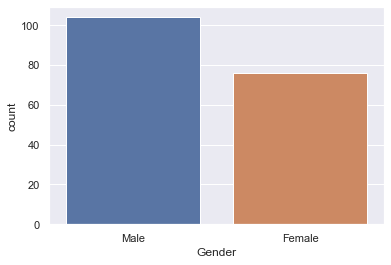

In [55]:
sns.countplot(x='Gender', data=cardiofitness);

__Observations (Gender)__
* We can safely say based on visual observation that there are 105 Male and 75 Female customers
* The ratio of female to male customers is 7:10

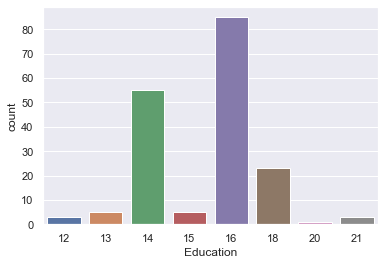

In [52]:
sns.countplot(x='Education', data=cardiofitness);

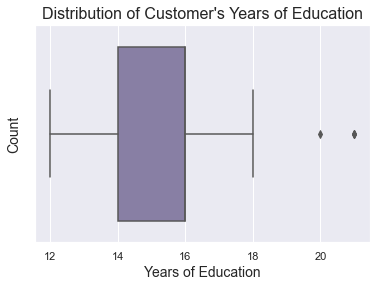

In [69]:
boxplot=sns.boxplot(x='Education', data=cardiofitness, color='#8579aa');
boxplot.axes.set_title("Distribution of Customer's Years of Education", fontsize=16)
boxplot.set_xlabel("Years of Education", fontsize=14)
boxplot.set_ylabel("Count", fontsize=14)
plt.show()

__Observations (Education)__
* Most of the customers have 16 years of education
* Bulk of the customers have between 14 and 18 years of education
* There are a very few customers who have 20 or more years of education. Same goes for customers with less than 13 years of education.
* We can see from the box plot that the lower quartile is 14 and upper quartile is 16. The IQR is 2.
* There are some plot points outside of the whisker indicating outliers

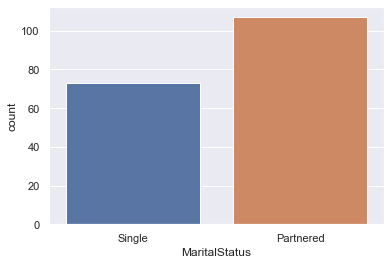

In [60]:
sns.countplot(x='MaritalStatus', data=cardiofitness);

__Observations (MaritalStatus)__
* We can safely say based on visual observation that there are more partnered customers than the single customers
* Based on visual observation, the count of Single customers is 70 and the count of partnered customers is 110

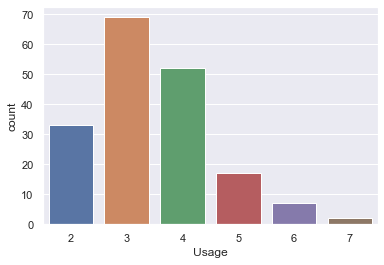

In [59]:
sns.countplot(x='Usage', data=cardiofitness);

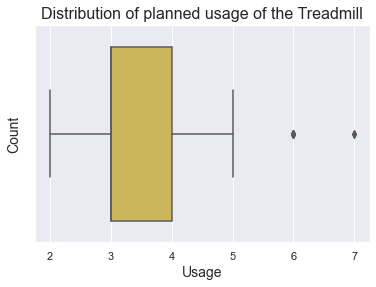

In [70]:
boxplot = sns.boxplot(x='Usage', data=cardiofitness, color="#dfc149");
boxplot.axes.set_title("Distribution of planned usage of the Treadmill", fontsize=16)
boxplot.set_xlabel("Usage", fontsize=14)
boxplot.set_ylabel("Count", fontsize=14)
plt.show()

__Observations (Usage)__
* Based on the histogram, we see the distribution skewing to the right
* A bulk of the observations lie within the first three classes.
* We can safely say based on visual observation that number of times the users want to use the Treadmill is between 2 and 4
* We can see from the box plot that the lower quartile is 3 and upper quartile is 4. The IQR is 1.
* There are some plot points outside of the whisker indicating outliers

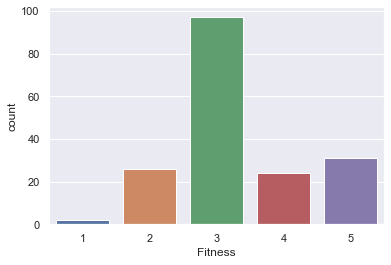

In [67]:
sns.countplot(x='Fitness', data=cardiofitness);

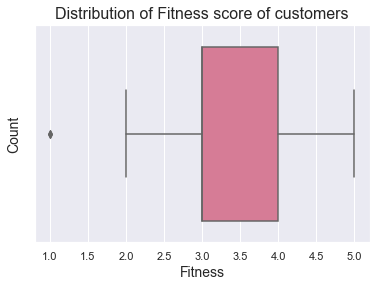

In [79]:
boxplot = sns.boxplot(x='Fitness', data=cardiofitness, color="#e56d90");
boxplot.axes.set_title("Distribution of Fitness score of customers", fontsize=16)
boxplot.set_xlabel("Fitness", fontsize=14)
boxplot.set_ylabel("Count", fontsize=14)
plt.show()

__Observations (Fitness)__
* Most customers have self-rated fitness score of 3
* The histogram is approximately symmetrical
* From the box plot, we can visually see that the lower quartile is 30 and upper quartile is 40. IQR = 10
* There are some plot points outside of the whisker indicating outliers

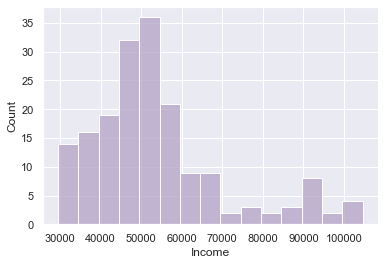

In [80]:
# Histogram for Income
sns.histplot(cardiofitness.Income, color='#b2a2c6');

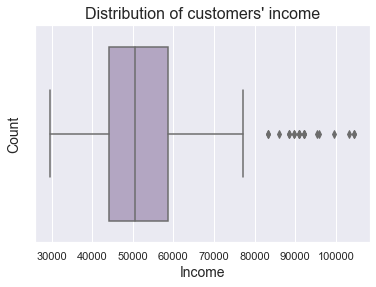

In [81]:
# Box plot for Income
boxplot=sns.boxplot(x='Income', data=cardiofitness, color='#b2a2c6');
boxplot.axes.set_title("Distribution of customers' income", fontsize=16)
boxplot.set_xlabel("Income", fontsize=14)
boxplot.set_ylabel("Count", fontsize=14)
plt.show()

__Observations (Income)__
* Based on the histogram, we see the distribution skewing to the right
* Most of the customer income lie between 30000 and 70000
* Very few customers have income greater than 70000
* From the box plot, we can visually see that the lower quartile is 44000 and upper quartile is 59000. IQR = 15000
* There are many plot points outside of the whisker indicating outliers

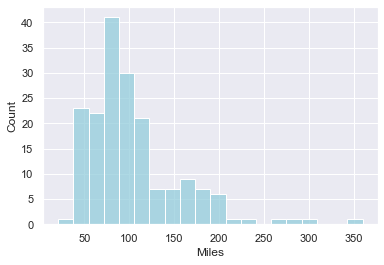

In [87]:
# Histogram for Miles
sns.histplot(cardiofitness.Miles, color='#93cddc');

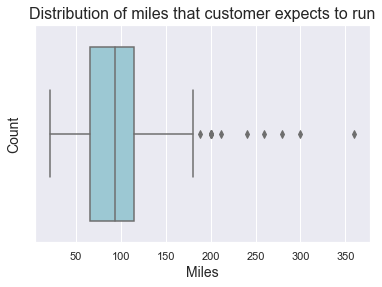

In [86]:
# Box plot for Miles
boxplot=sns.boxplot(x='Miles', data=cardiofitness, color='#93cddc');
boxplot.axes.set_title("Distribution of miles that customer expects to run", fontsize=16)
boxplot.set_xlabel("Miles", fontsize=14)
boxplot.set_ylabel("Count", fontsize=14)
plt.show()

__Observations (Miles)__
* Based on the histogram, we see the distribution skewing to the right
* Most of the customer plam to run between 25 and 125 miles. Some of the customers plan to run between 125 and 200. 
* Very few customers have plans to run beyond 200 miles
* From the box plot, we can visually see that the lower quartile is 60 and upper quartile is 125. IQR = 65
* There are many plot points outside of the whisker indicating outliers

## 7.4 Relationship Analysis

### 7.4.1 Looking at the relationship between numerical variables using pair plots and correlation plots

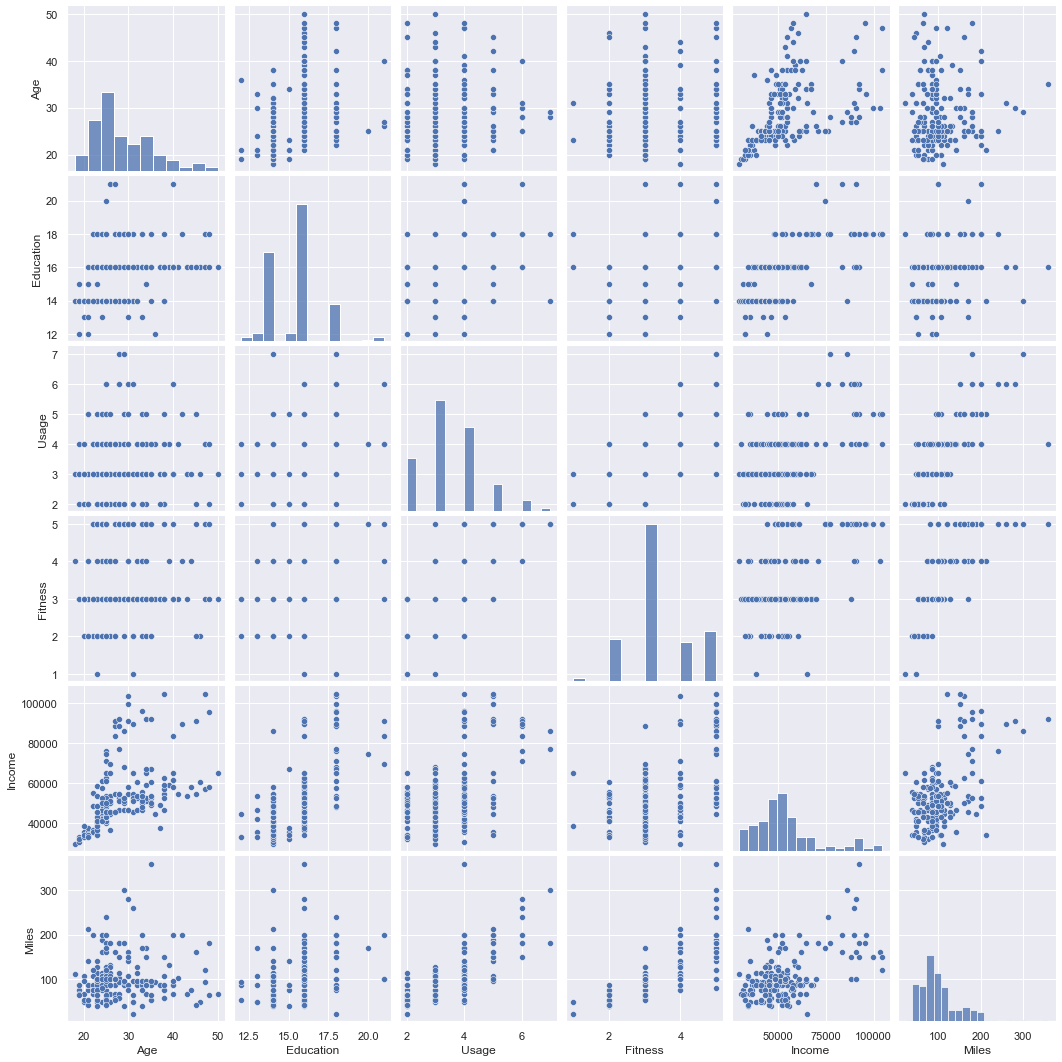

In [91]:
# Plot the pairplot to identify the relationships between various features
sns.pairplot(cardiofitness);

__Observations__
* We can see from the histograms that Age, Usage, Income and Miles skew to the right
* With increase in Age, the scatter plot shows that the income values tend to be higher
* With increase in Fitness score, we see that the Average treadmill usage also increases
* With increase in Fitness score, the Miles that a customer expects to run also increases
* With increase of no of years of education, we see a pattern of increased income

In [93]:
correlation = cardiofitness.corr()
correlation

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


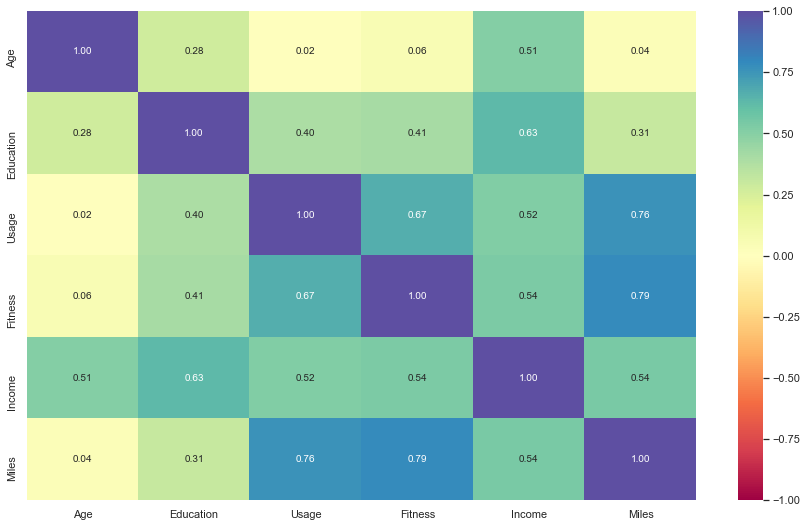

In [134]:
# Plot the heatmap of the correlation
plt.figure(figsize=(15, 9))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

__Observations__
1. `Miles` has high positive correlation with `Usage` and `Fitness`. All these values are highly correlated with each other.
2. Also `Education` has high positive correlation with `Income`
3. Age has a positive correlation with `Income`

### 7.4.2 Let us look at the count of features in dataset

In [213]:
# Calculate age group based on the age and add that as a column to the copy of cardiofitness dataframe
cf_with_age_grp=cardiofitness.copy()
cf_with_age_grp['AgeGroup']=pd.cut(cf_with_age_grp.Age,bins=(0,20,30,40,55),labels=('0-20','20-30','30-40','40+'))
cf_with_age_grp

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup
0,TM195,18,Male,14,Single,3,4,29562,112,0-20
1,TM195,19,Male,15,Single,2,3,31836,75,0-20
2,TM195,19,Female,14,Partnered,4,3,30699,66,0-20
3,TM195,19,Male,12,Single,3,3,32973,85,0-20
4,TM195,20,Male,13,Partnered,4,2,35247,47,0-20
...,...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200,30-40
176,TM798,42,Male,18,Single,5,4,89641,200,40+
177,TM798,45,Male,16,Single,5,5,90886,160,40+
178,TM798,47,Male,18,Partnered,4,5,104581,120,40+


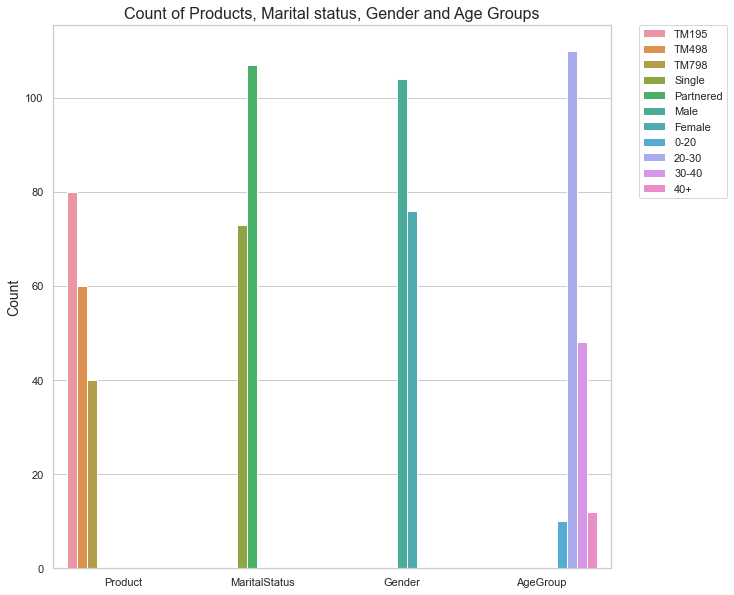

In [223]:
# Plot the count plot for 4 features in the cardiofitness dataset
plt.figure(figsize=(10, 10))
cf_counts=cf_with_age_grp.loc[:,['Product', 'MaritalStatus', 'Gender','AgeGroup']]
countplot=sns.countplot(x="variable", hue="value", data=pd.melt(cf_counts));
countplot.axes.set_title("Count of Products, Marital status, Gender and Age Groups", fontsize=16)
countplot.set_xlabel("", fontsize=14)
countplot.set_ylabel("Count", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

__Observations__:
* Product "TM195" has outsold the nearest product by 20%. But the other two products are closer in sales
* "Partnered" customers have bought significantly more treadmills than "Single" ones
* "Male" customers have bought significantly more than the "Female" customers
* Customers in "20-30" age group have bought the maximum treadmills when compared to the other age groups

### 7.4.3 Let us look at the relationship between income and education and the purchase of products

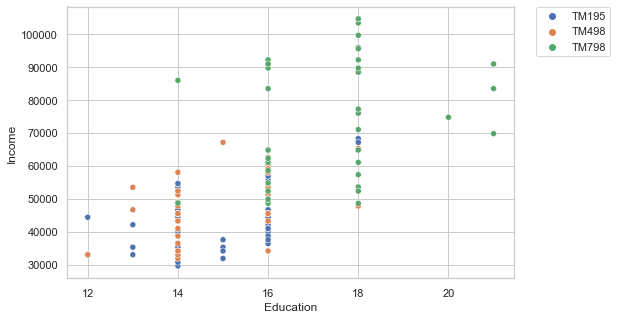

In [252]:
# Plot a scatter plot to identify the relationship between income, education and the various products
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Education', y='Income', hue='Product', data=cardiofitness);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

__Observations__
* We see in the scatter plot that with the increase in years of education, we also see income go up
* Mostly customers in the lower to middle income bracket (<50000) purchase either "TM195" or "TM498"
* High income customers mostly purchase "TM798" product

### 7.4.4 Let us look at the marital status and gender of the customers who have purchased the treadmill

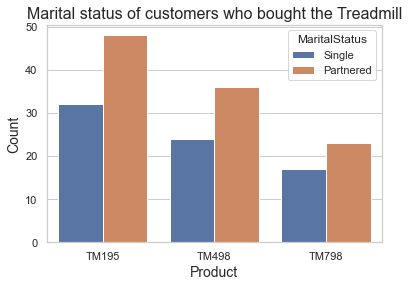

In [230]:
# Plot the count of Single and Partnered customers who purchased each product
countplot=sns.countplot(x="Product", hue="MaritalStatus", data=cardiofitness);
countplot.axes.set_title("Marital status of customers who bought the Treadmill", fontsize=16)
countplot.set_xlabel("Product", fontsize=14)
countplot.set_ylabel("Count", fontsize=14)
plt.show()

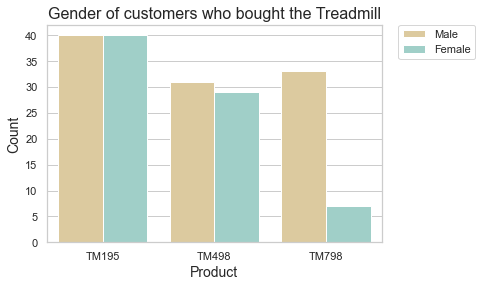

In [239]:
# Plot the count of male and female customers who purchased each product
countplot=sns.countplot(x="Product", hue="Gender", data=cardiofitness, palette=sns.color_palette("BrBG", 2));
countplot.axes.set_title("Gender of customers who bought the Treadmill", fontsize=16)
countplot.set_xlabel("Product", fontsize=14)
countplot.set_ylabel("Count", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

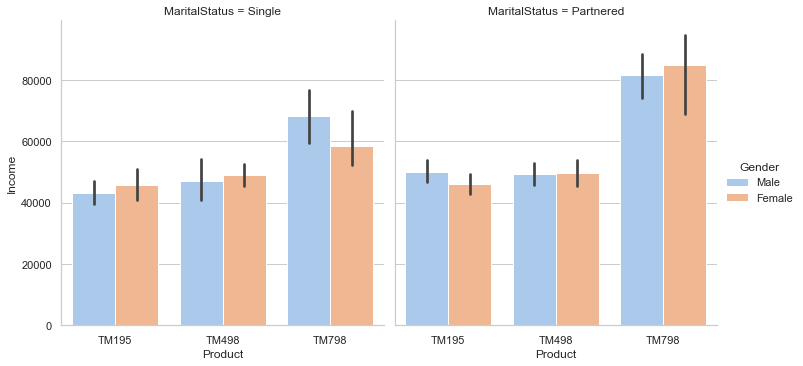

In [255]:
# Plot the categorical plot between Product, Income, Gender and Marital Status
sns.catplot(x="Product", y = "Income", hue="Gender", col="MaritalStatus", 
            data=cardiofitness, kind="bar", palette=sns.color_palette("pastel"));

__Observations__
* We see that "Partnered" customers purchase more treadmill than "Single" customers (from maritalstatus graph)
* Women buy "TM798" significantly less than Men (from gender graph). Other two products are equally purchased by both men and women
* Both male and female "Partnered" customers buy Treadmills equally (from catplot graph). But Females in "Single" customers buy "TM798" less than the males.
* The catplot graph also indicates that people who  buy "TM798" are high income earners

### 7.4.5 Let us look at the Gender and Age of the customers who have purchased the Treadmill

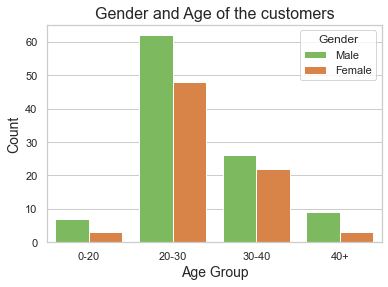

In [268]:
# Plot the male and female customers in each group
colors = ['#78C850', '#F08030', '#6890F0','#F8D030', '#F85888', '#705898', '#98D8D8']
countplot=sns.countplot(x="AgeGroup", hue="Gender", data=cf_copy, palette=colors);
countplot.axes.set_title("Gender and Age of the customers", fontsize=16)
countplot.set_xlabel("Age Group", fontsize=14)
countplot.set_ylabel("Count", fontsize=14)
plt.show()

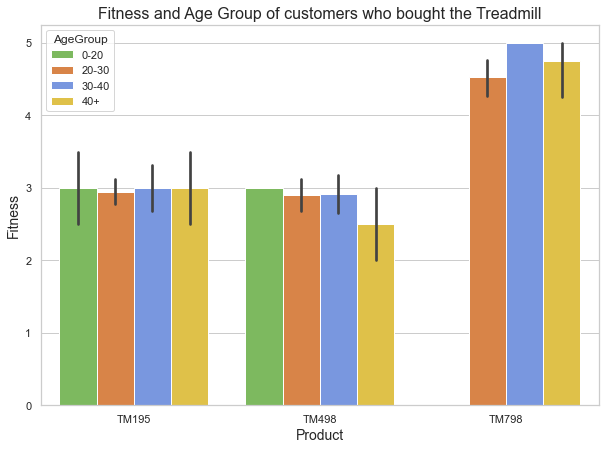

In [269]:
# Plot a graph which measures the age group, fitness score and the product that they purchased
plt.figure(figsize=(10, 7))
barplot=sns.barplot(x="Product", y="Fitness", hue="AgeGroup", data=cf_copy, palette=colors);
barplot.axes.set_title("Fitness and Age Group of customers who bought the Treadmill", fontsize=16)
barplot.set_xlabel("Product", fontsize=14)
barplot.set_ylabel("Fitness", fontsize=14)
plt.show()

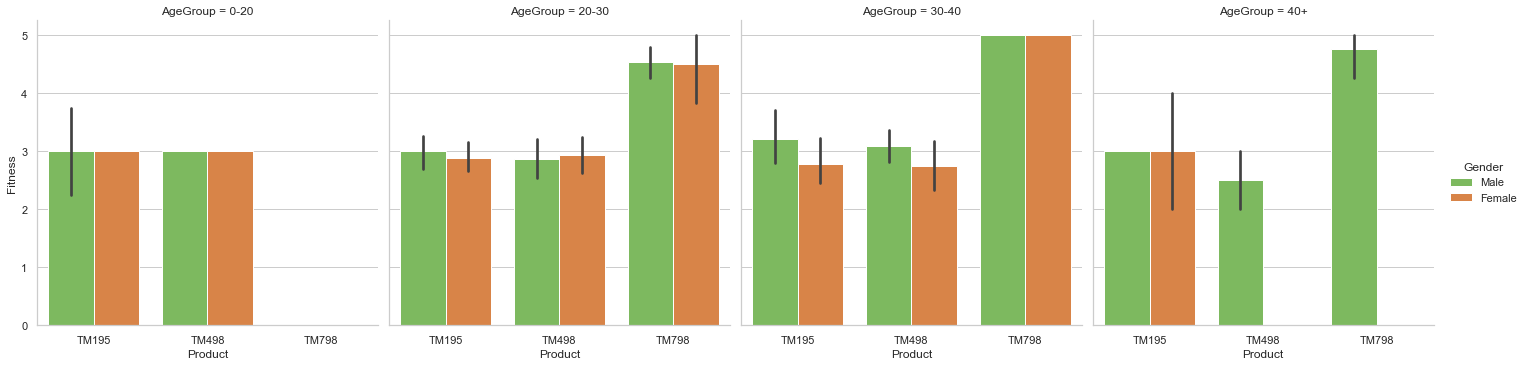

In [271]:
# Plot the categorical plot between Product, Fitness, Gender and Age Group
sns.catplot(x="Product", y = "Fitness", hue="Gender", col="AgeGroup", 
            data=cf_copy, kind="bar", palette=colors);

__Observations__
* Most of the customers are in the 20 to 30 age group (Almost 100 of 180 belong to this age group)
* People in the age group "0 to 20" do not buy "TM798" 
* People who buy "TM798" tend to have high Fitness scores
* Women in age group 40+ do not buy "TM498" and "TM798"

# 8. Conclusion
Following are the insights and recommendations to target new customers
1. Women in age group 40+ do not buy "TM498" and "TM798". We can influence women in this age group to buy these two Treadmills.
2. People in the age group "0 to 20" do not buy "TM798". We can cross sell other Treadmills to this group.
3. Most of the customers are in the 20 to 30 age group. So we need to target other age groups more.
4. Females in "Single" customers buy "TM798" less than the males - so we can specifically target single women to upsell "TM798"
5. Generally Male" customers have bought significantly more treadmills than the Female customers. We need to focus on women more to improve the sales